# Creating a Neural Network for Regression Problems

In this notebook, we are going to create different neural networks based on the tensorflow libraries, analyze the basic parameters used to build them, what ideas we need to mind when it comes to choosing certain options in order to solve some simple regression problems. The idea is to understand the basics to build Neural Networks (NN) to help us find a solution for these kind of problems.

First we need to understand. What is a NN ? A NN is a machine learning model that makes asses a certain result based on a criteria that it has been trained for, making its own decision when making these assesments.

## Basic architecture of a NN

To start, for a matter of simplification, we can define a NN as a system that is based of 3 parts: An input layer, a group of hidden layers and an output layer.

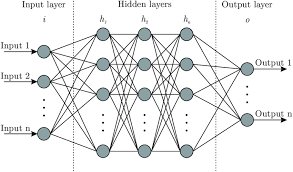

In order to make a NN work, we perform what is called modelling a NN. Modelling a neural netowrk consists of:

1.  **Create a model**, where we decide the size, number and type of the layers.

2.  **Compile the model**, where we define the loss function, we choose the optimizer and decide the metrics we use to evaluate our model.

3.  **Fit the model**, where we adjust the trainning data to our model and examinate how the model interacts and learns with that data.


| **Hyperparameter**      | **Description**                                                                 |
|--------------------------|---------------------------------------------------------------------------------|
| **Input Layer**          | First layer of the network; defines the input shape based on the data features. |
| **Hidden Layer(s)**      | Intermediate layers between input and output; capture patterns in the data.     |
| **Units per Layer**      | Number of neurons in each hidden layer; determines the capacity of the layer.   |
| **Output Layer**         | Final layer of the network; outputs predictions in the desired format.          |
| **Hidden Activation**    | Function applied in hidden layers to introduce non-linearity (e.g., ReLU, Tanh).|
| **Output Activation**    | Function applied to the output layer (e.g., Softmax for classification).        |
| **Loss Function**        | Metric used to compute error for optimization (e.g., MSE, Cross-Entropy).       |
| **Optimizer**            | Algorithm used to update weights (e.g., SGD, Adam).                            |
|**Number of Epochs**      | Total number of complete passes through the training dataset during training.|


First, import the main libraries to create and handle NN. For creating our model, we use Tensorflow.

In [1]:
import tensorflow as tf
print(tf.__version__)

2024-11-23 12:42:14.164833: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-23 12:42:14.299035: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-23 12:42:14.488092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-23 12:42:14.669855: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-23 12:42:14.671084: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-23 12:42:14.972664: I tensorflow/core/platform/cpu_feature_guard.cc:

2.16.2


Other useful libraries we are going to use to handle data and data representation are numpy and matplotlib. Along the way, we may add other libraries to represent the data on different ways, handle it with other specific functions that come from other libraries like seaborn, as well as use scikitlearn, another library that can be used for data analysis and creating models for regression analysis.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Building our first model

Building a model for linear regression or on this case, for simple linear regression makes sense only if there is correlation on the data we are studying, so it is importat to visualize and understand : Is this the correct approach? Do these result make sense?

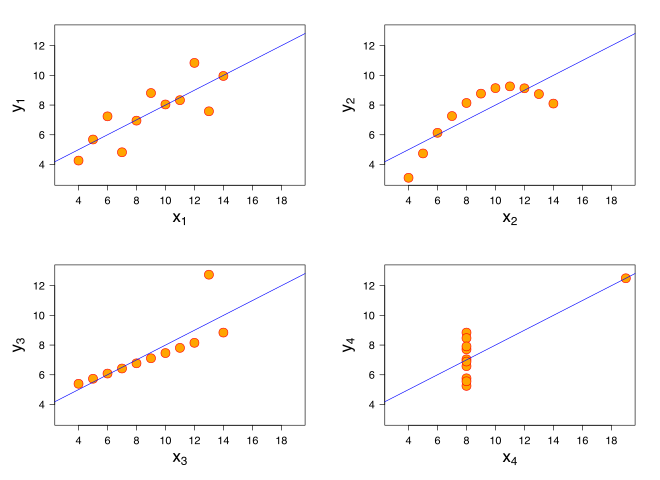

For our first model, we are going to try to recreate a NN to predict the correlation of two variables: the indepent coefficient (alpha) and the slope(beta) from out input(X) and output(y) values. When creating a NN model, we also identify our inputs as our features, and our outputs as our labels.



For our experiment, we go y = 2x + 3. We can create some values for it:


Our features: [ 1  2  3  4  5  6  7  8  9 10]
Our labels: [ 5  7  9 11 13 15 17 19 21 23]


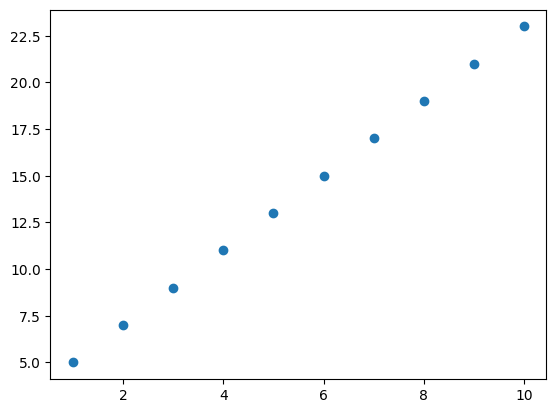

In [3]:
def OurLinearCorrelation(x):
    return ((2*x)+3)

x = np.arange(1,11)
y = OurLinearCorrelation(x)

print("Our features:",x)
print("Our labels:",y)
plt.scatter(x,y)

## Modelling in Tensorflow

When building our neural network with Tensorflow, we need to follow the steps mentioned before.

In [4]:
# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)


2024-11-23 12:42:23.607969: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-23 12:42:23.609279: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step - loss: 4.6861 - mae: 4.6861
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 4.3736 - mae: 4.3736
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 4.0611 - mae: 4.0611
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3.7486 - mae: 3.7486
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3.4361 - mae: 3.4361


In [5]:
x,y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23]))

We can test now the model with a prediction, knowing for our simple regression problem what the value should be based on the mathematical relation we defined before ( y = 2x + 3). So for example for x = 20, y should be equal to 43.

In [6]:
model.predict(tf.constant([20]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[39.418827]], dtype=float32)

## The iterative process for improving our model

We created our first model for this notebook, making a very simple NN with only dense layer in the hidden layer group and as a result, we can see that the average prediction is 4 points away ( 6 away in our prediction).

To improve how our NN perform, we have different options:

1.  Modify the amount of layers. 
2.  Modify the amount of neurons.
3.  Change the activation function from our layers.
4.  Change the optimization function used.
5.  Modify the learning rate.
6.  Increase the amount of data fit into the model.
7.  Modify the amount of Epochs.

For efficiency, we can try to first stick to only one layer and try to modify other hyperparameters to improve how our NN performs. Some options we can try are instead of mae, use mse to penalize more the errors we are having as the correlation we want to replicate is fairly simple. We can also amount a bit the amount of epochs and compare results.

Let's start first just by adding some more epochs.

In [7]:
# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(x, axis=-1), y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - loss: 20.4826 - mae: 20.4826
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 20.1701 - mae: 20.1701
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 19.8576 - mae: 19.8576
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 19.5451 - mae: 19.5451
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 19.2326 - mae: 19.2326
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 18.9201 - mae: 18.9201
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 18.6076 - mae: 18.6076
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 18.2951 - mae: 18.2951
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 17.9826 - mae: 17.9826
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 17.6701 - mae: 17.6701
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 17.3576 - mae: 17.3576
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 17.0451 - mae: 17.0451
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━

In [8]:
print("Prediction of our model: ",model.predict(tf.constant([20])))
print("Actual result should be: ",OurLinearCorrelation(20))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction of our model:  [[-1.3729559]]
Actual result should be:  43


The metric used seems reduced and the model seem to behave better now. Our first model was quite away with a mae bigger than desirable. Let's check what happens if we change the loss function to mse.

In [9]:
# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(x, axis=-1), y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step - loss: 58.9405 - mae: 7.3358
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 4.3257 - mae: 2.0355
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.8063 - mae: 1.0958
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.6772 - mae: 1.0789
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.6579 - mae: 1.0729
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.6438 - mae: 1.0704
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.6300 - mae: 1.0664
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.6164 - mae: 1.0621
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.6028 - mae: 1.0576
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.5894 - mae: 1.0532
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.5761 - mae: 1.0488
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.5628 - mae: 1.0444
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1

In [10]:
print("Prediction of our model: ",model.predict(tf.constant([20])))
print("Actual result should be: ",OurLinearCorrelation(20))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction of our model:  [[47.869476]]
Actual result should be:  43


At a first glance, MSE has provided better results for now. MAE prediction value should be lower.

In [11]:
# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.16),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(x, axis=-1), y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step - loss: 545.8729 - mae: 21.3161
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 494.0367 - mae: 20.2762
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 444.8635 - mae: 19.2378
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 398.3945 - mae: 18.2024
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 354.6640 - mae: 17.1713
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 313.6960 - mae: 16.1459
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 275.5049 - mae: 15.1277
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 240.0938 - mae: 14.1184
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 207.4538 - mae: 13.1198
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 177.5629 - mae: 12.1338
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 150.3851 - mae: 11.1622
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 125.8700 - mae: 10.2073
Epoch 13/20
1/1 ━━━━━━━━

In [12]:
print("Prediction of our model: ",model.predict(tf.constant([20])))
print("Actual result should be: ",OurLinearCorrelation(20))
print("Prediction of our model: ",model.predict(tf.constant([40])))
print("Actual result should be: ",OurLinearCorrelation(40))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction of our model:  [[33.44716]]
Actual result should be:  43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction of our model:  [[64.03639]]
Actual result should be:  83


We can see that modifying some hyperparameters have already improve a bit the prediction without having to add a new layer. But still, the linear relation is fairly simple and we could get a closer value. Adding an extra layer could make sense as there is two variables to have in mind in this linear problem. Changing back from mse to mae can also help.

In [13]:
# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model_mae = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_mae.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.20),
              metrics=["mae"])

# 3. Fit the model

model_mae.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step - loss: 15.3792 - mae: 15.3792
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.2348 - mae: 14.2348
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.6181 - mae: 13.6181
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.4251 - mae: 13.4251
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.3998 - mae: 13.3998
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.2786 - mae: 13.2786
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.9686 - mae: 12.9686
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.4886 - mae: 12.4886
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.8602 - mae: 11.8602
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.0534 - mae: 11.0534
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.9817 - mae: 9.9817
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.5402 - mae: 8.5402
Epoch 13/100
1/1 ━━━━━━━━━━━

In [14]:
# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model_mse = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_mse.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.20),
              metrics=["mse"])

# 3. Fit the model

model_mse.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step - loss: 212.7054 - mse: 212.7054
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 174.2499 - mse: 174.2499
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 127.2288 - mse: 127.2288
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 77.5178 - mse: 77.5178
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 33.1778 - mse: 33.1778
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.7486 - mse: 4.7486
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.9225 - mse: 2.9225
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 25.6278 - mse: 25.6278
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 45.4014 - mse: 45.4014
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 45.1803 - mse: 45.1803
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 31.3785 - mse: 31.3785
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 15.1486 - mse: 15.1486
Epoch 13/100
1/1 ━━━━━

In [15]:
print("Prediction of our model with MSE: ",model_mse.predict(tf.constant([20])))
print("Prediction of our model with MAE: ",model_mae.predict(tf.constant([20])))
print("Actual result should be: ",OurLinearCorrelation(20))
print("Prediction of our model with MSE: ",model_mse.predict(tf.constant([40])))
print("Prediction of our model with MAE: ",model_mae.predict(tf.constant([40])))
print("Actual result should be: ",OurLinearCorrelation(40))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction of our model with MSE:  [[42.72567]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction of our model with MAE:  [[45.110313]]
Actual result should be:  43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction of our model with MSE:  [[82.414154]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction of our model with MAE:  [[87.09602]]
Actual result should be:  83


When is better to use MSE or MAE?
* With **MSE** we penalize more the errors, which means if there is any outliers, we are going to make the model have them more in mind whenever to stablish a pattern that tries to include them.

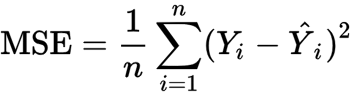

* **MAE** is more robust for the average value, which means that it is going to ignore noisy values or values that show different behavior to the majority of the values.

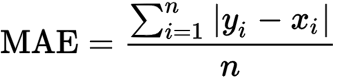

Let's check how this looks with a real example.

## MAE and MSE comparison with outliers

Lets try to create a larger dataset and add some outliers.

In [16]:
x_large = np.arange(-100,50,2)

y_large = OurLinearCorrelation(x_large)

Let's add now 3 outliers. I.e for x=1, y=20// x=-99 y =0 and x=49 y = 20.

In [17]:
x_outliers = np.append(x_large,[1,-99,49])
x_outliers

array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
        -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
        -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
        -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
        -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
         10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
         32,   34,   36,   38,   40,   42,   44,   46,   48,    1,  -99,
         49])

In [18]:
y_outliers = np.append(y_large,[20,0,20])
y_outliers

array([-197, -193, -189, -185, -181, -177, -173, -169, -165, -161, -157,
       -153, -149, -145, -141, -137, -133, -129, -125, -121, -117, -113,
       -109, -105, -101,  -97,  -93,  -89,  -85,  -81,  -77,  -73,  -69,
        -65,  -61,  -57,  -53,  -49,  -45,  -41,  -37,  -33,  -29,  -25,
        -21,  -17,  -13,   -9,   -5,   -1,    3,    7,   11,   15,   19,
         23,   27,   31,   35,   39,   43,   47,   51,   55,   59,   63,
         67,   71,   75,   79,   83,   87,   91,   95,   99,   20,    0,
         20])

Let's also separate and have a testing dataset and a training dataset. We will use the 80% of the end data as training data as it includes the outliers, and the first 20% as test data.

In [19]:
print(len(y_outliers))
print(0.2*len(y_outliers))


78
15.600000000000001


In [20]:
y_test = y_outliers[:16]
x_test = x_outliers[:16]
y_train = y_outliers[16:]
x_train = x_outliers[16:]

Let's also visualize how the data is looking:

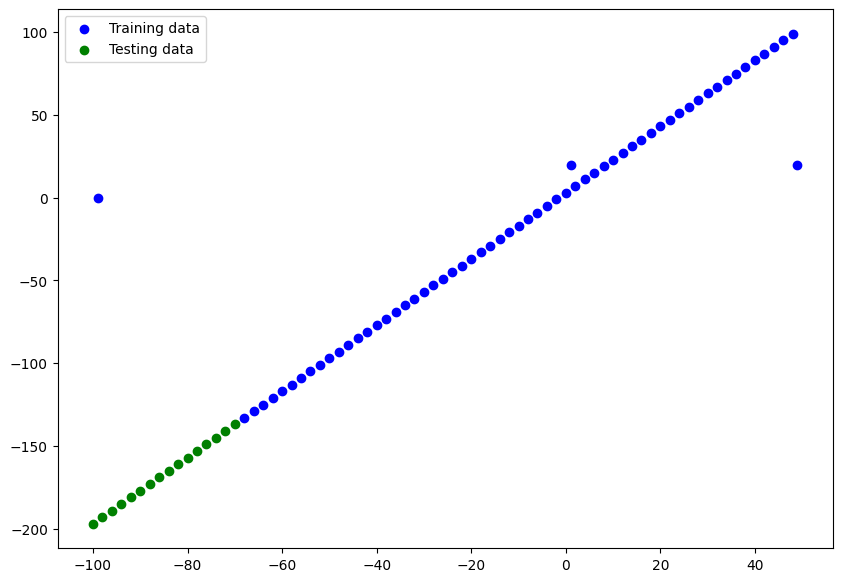

In [21]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(x_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

Now, let's try to compare how both MSE and MAE models behave.
Let's make separate models as we did before. First MSE.

In [22]:
# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model_mse = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1),
])

# 2. Compile the model

model_mse.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.2),
              metrics=["mse"])

# 3. Fit the model

model_mse.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 12878.1670 - mse: 12878.1670 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7571.3179 - mse: 7571.3179
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5277.8560 - mse: 5277.8560
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4583.9648 - mse: 4583.9648
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4697.1880 - mse: 4697.1880
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5120.1279 - mse: 5120.1279
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5464.7573 - mse: 5464.7573
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5512.0972 - mse: 5512.0972 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5276.7485 - mse: 5276.7485 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4910.9028 - mse: 4910.9028
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4558.6938 - mse: 4558.6938
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4282

And now here MAE model.

In [23]:
# 1. Create our model

model_mae = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_mae.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.20),
              metrics=["mae"])

# 3. Fit the model

model_mae.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 50.4475 - mae: 50.4475
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 33.4521 - mae: 33.4521
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13.2733 - mae: 13.2733
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16.2654 - mae: 16.2654
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.3861 - mae: 9.3861
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.5987 - mae: 12.5987
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.4144 - mae: 15.4144
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.9854 - mae: 10.9854
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.5017 - mae: 7.5017
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.3531 - mae: 9.3531
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4214 - mae: 5.4214
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0608 - mae: 6.0608
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━

Let's now predict with the test data.

In [24]:
y_predict_mse = model_mse.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [25]:
y_predict_mae = model_mae.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


We can also use the independed mae and mse functions from tensorflow to calculate the error by using the test values and the prediction values: 

In [26]:
y_test.shape, y_predict_mae.squeeze().shape

((16,), (16,))

In [27]:
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mse_metric = tf.keras.metrics.MeanSquaredError()

In [28]:
def ShowMAE(y_test, y_pred):
    mae_metric.reset_state()
    mae_metric.update_state(y_test, y_pred.squeeze())
    mae_value = mae_metric.result().numpy()
    print(f"Mean Absolute Error: {mae_value}")
    return mae_value

def ShowMSE(y_test, y_pred):
    mse_metric.reset_state()
    mse_metric.update_state(y_test, y_pred.squeeze())
    mse_value = mse_metric.result().numpy()
    print(f"Mean Squared Error: {mse_value}")
    return mse_value
ShowMAE(y_test, y_predict_mae)
ShowMSE(y_test, y_predict_mse)

Mean Absolute Error: 8.085654258728027
Mean Squared Error: 560.2911987304688


560.2912

In [29]:
print("mae evaluation",model_mae.evaluate(x_test,y_test))
print("mse evaluation",model_mse.evaluate(x_test,y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 8.0857 - mae: 8.0857
mae evaluation [8.085654258728027, 8.085654258728027]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 560.2912 - mse: 560.2912
mse evaluation [560.2911987304688, 560.2911987304688]


And let's visualize the differences

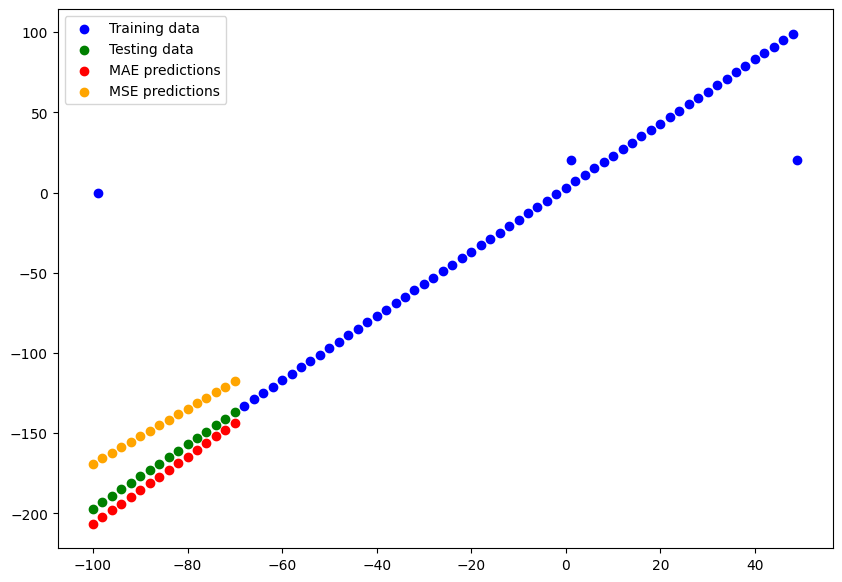

In [30]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(x_test, y_test, c='g', label='Testing data')
# Plot MAE predictions in red
plt.scatter(x_test, y_predict_mae, c='r', label='MAE predictions')
# Plot MSE predictions in red
plt.scatter(x_test, y_predict_mse, c='orange', label='MSE predictions')
# Show the legend
plt.legend();

In this case, it seems that with just a few outliers, MAE is performing better. How would it be with the normal data?

In [31]:
0.2*len(x_large)

15.0

In [32]:
y_test = y_large[:15]
x_test = x_large[:15]
y_train = y_large[15:]
x_train = x_large[15:]

In [33]:
# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model_mae = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_mae.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.20),
              metrics=["mae"])

# 3. Fit the model

model_mae.fit(tf.expand_dims(x_large, axis=-1), y_large, epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 101.4011 - mae: 101.4011
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 84.5529 - mae: 84.5529
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 81.5153 - mae: 81.5153
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 64.2848 - mae: 64.2848
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.0107 - mae: 23.0107
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 34.2496 - mae: 34.2496
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.2682 - mae: 26.2682
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9670 - mae: 8.9670
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.2599 - mae: 14.2599
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2968 - mae: 4.2968
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.0948 - mae: 4.0948
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5856 - mae: 4.5856
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━

In [34]:
# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model_mse = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1),
])

# 2. Compile the model

model_mse.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.2),
              metrics=["mse"])

# 3. Fit the model

model_mse.fit(tf.expand_dims(x_large, axis=-1), y_large, epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 9759.5898 - mse: 9759.5898 
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3842.2085 - mse: 3842.2085
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 255.6637 - mse: 255.6637
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2394.7075 - mse: 2394.7075
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 376.7026 - mse: 376.7026
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 330.5538 - mse: 330.5538
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 843.5681 - mse: 843.5681
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 430.2079 - mse: 430.2079
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29.7317 - mse: 29.7317
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 286.7273 - mse: 286.7273
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 219.4633 - mse: 219.4633
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.3882 - mse: 18.3882
Epoch

In [35]:
y_predict_mae = model_mae.predict(x_test)
y_predict_mse = model_mse.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [36]:
print("mae evaluation",model_mae.evaluate(x_test,y_test))
print("mse evaluation",model_mse.evaluate(x_test,y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 8.2214 - mae: 8.2214
mae evaluation [8.221381187438965, 8.221381187438965]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 1.3194e-09 - mse: 1.3194e-09
mse evaluation [1.3193736103644937e-09, 1.3193736103644937e-09]


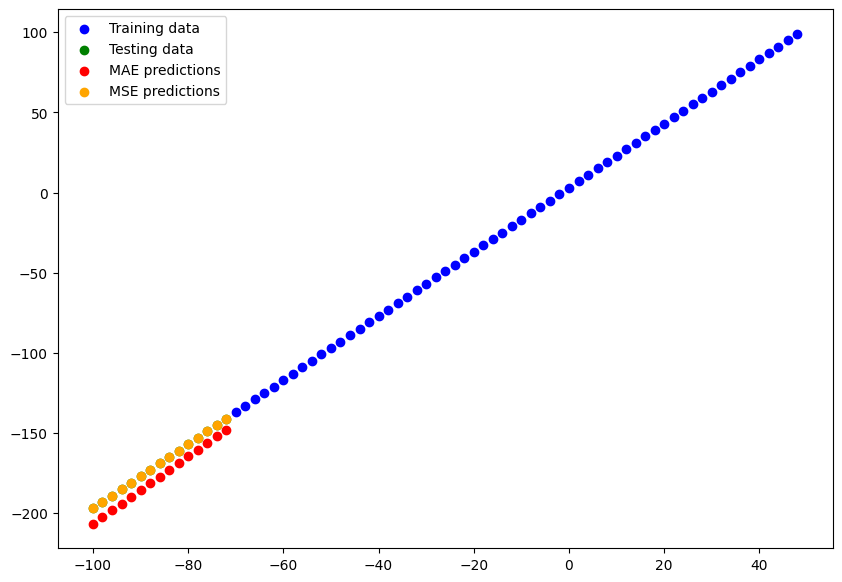

In [37]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(x_test, y_test, c='g', label='Testing data')
# Plot MAE predictions in red
plt.scatter(x_test, y_predict_mae, c='r', label='MAE predictions')
# Plot MSE predictions in red
plt.scatter(x_test, y_predict_mse, c='orange', label='MSE predictions')
# Show the legend
plt.legend();

We can draw a conclusion based on experimentation that, for not very large datasets, MAE behaves better and gives better predictions when having just a few outliers. But we can see that without those outliers here, MSE gives a more accurate prediction for an experiment with these simple conditions ( small dataset, short numnber of layers ).

Let's get back to reviewing our model. We are creating a simple model for regression but, how simple is it? and how more can we evolve it?

## Summary of how our model is built

To check the model we have created before, we can use the function model.summary() from tensorflow.

In [38]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

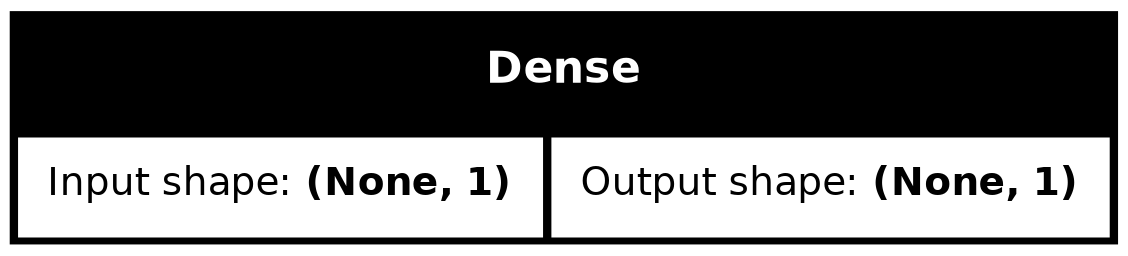

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

Let's try to modify the structure a bit : 

In [40]:
# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
   tf.keras.layers.Dense(1,name="output_layer")  
],name="Simple model")

# 2. Compile the model

model_mse.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.2),
              metrics=["mse"])


/home/david/venv39/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "Simple model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

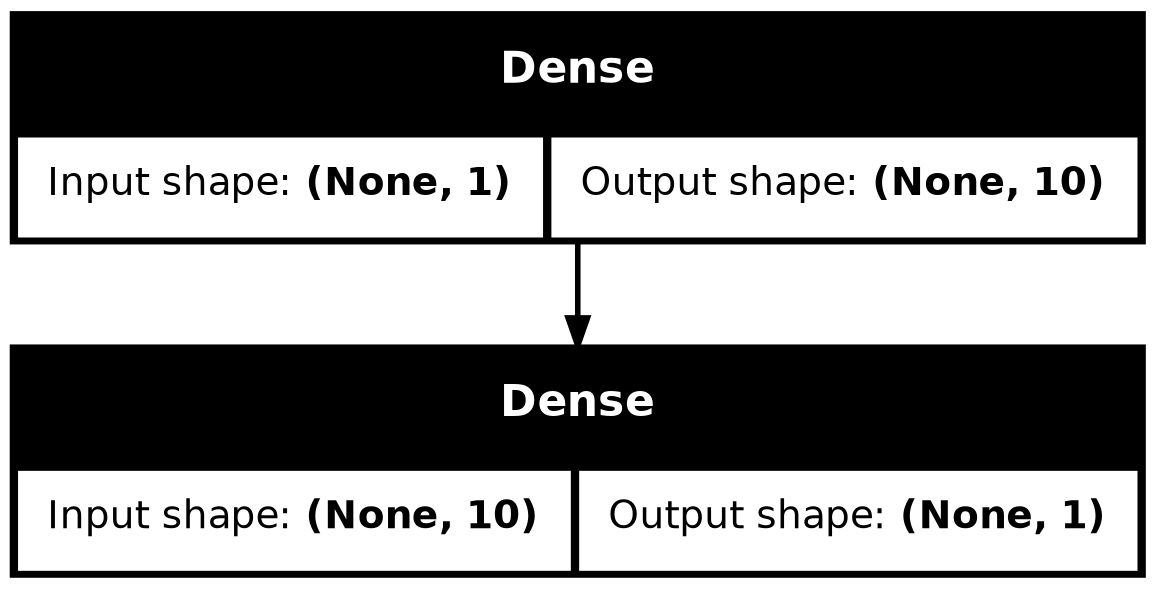

In [42]:
plot_model(model=model, show_shapes=True)

## Comparing models with different layers

Let's go back to the dataset we had with outlayers and run a model for the same number of epochs, another one with an extra layer and another one with an extra layer and larger number of epochs, and see the differences. We will define also the previous plot function to have a visual image of the prediction, along with the error resutls.

In [43]:
def plot_results(x_train,y_train,x_test,y_test,y_pred):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(x_train, y_train, c='b', label='Training data')
    # Plot test data in green
    plt.scatter(x_test, y_test, c='g', label='Testing data')
    # Plot predictions in red
    plt.scatter(x_test, y_predict_mae, c='r', label='Predictions')
    # Show the legend
    plt.legend();

In [44]:
# Simple model

# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model_simple = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
],name="Simple-model")

# 2. Compile the model

model_simple.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model

model_simple.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 71.6015 - mae: 71.6015
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 52.7692 - mae: 52.7692
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 33.9725 - mae: 33.9725
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.3027 - mae: 15.3027
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.3047 - mae: 3.3047
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.6793 - mae: 5.6793
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.2949 - mae: 5.2949
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.6839 - mae: 5.6839
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2971 - mae: 5.2971
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.6885 - mae: 5.6885
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.2994 - mae: 5.2994
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.6932 - mae: 5.6932
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

Let's see how it looks the `simple model` .

In [45]:
y_pred = model_simple.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [46]:
mae_simple = ShowMAE(y_test,y_pred)
mse_simple = ShowMAE(y_test,y_pred)

Mean Absolute Error: 21.50475311279297
Mean Absolute Error: 21.50475311279297


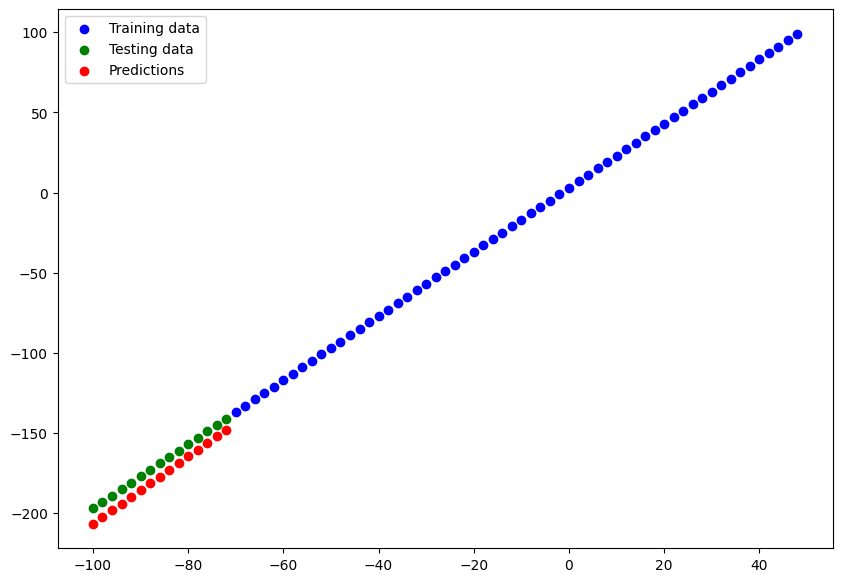

In [47]:
plot_results(x_train,y_train,x_test,y_test,y_pred)

Let's see with the `double model` with two dense layers.

In [48]:
#double-model

# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model_double = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_double.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model

model_double.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 67.4454 - mae: 67.4454 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 43.7529 - mae: 43.7529
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 14.8251 - mae: 14.8251
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19.5147 - mae: 19.5147
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 27.4517 - mae: 27.4517
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.2918 - mae: 23.2918
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.6900 - mae: 19.6900
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.6352 - mae: 16.6352
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.1821 - mae: 14.1821
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.8028 - mae: 11.8028
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.8552 - mae: 11.8552
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.9089 - mae: 11.9089
Epoch 13/100
2/2 ━━━━━━━

In [49]:
y_pred = model_double.predict(x_test)
mae_dobule = ShowMAE(y_test,y_pred)
mse_dobule = ShowMSE(y_test,y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Mean Absolute Error: 36.52034378051758
Mean Squared Error: 1346.1624755859375


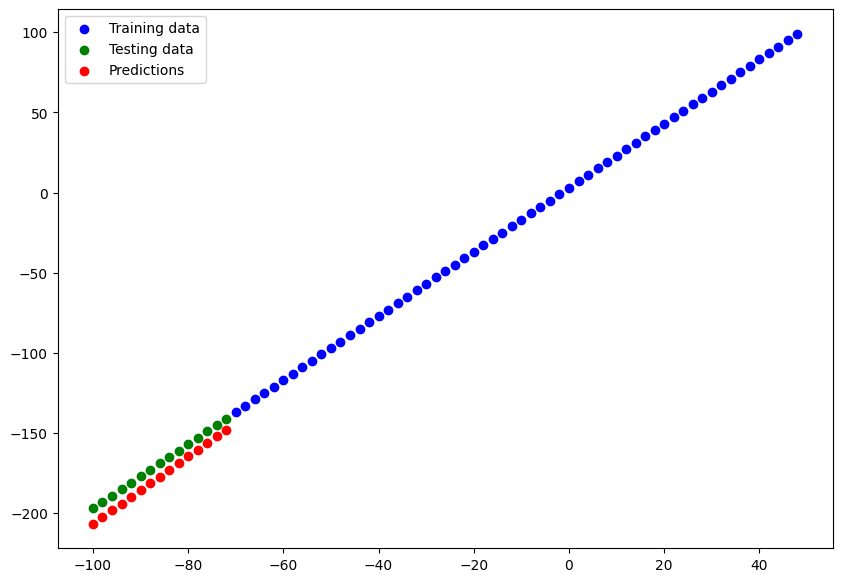

In [50]:
plot_results(x_train,y_train,x_test,y_test,y_pred)

Let's try with larger number of epochs.

In [51]:
#large-model

# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model_large = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_large.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model

model_large.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 86.1785 - mae: 86.1785
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 62.0757 - mae: 62.0757
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 49.5259 - mae: 49.5259
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25.6272 - mae: 25.6272
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.2478 - mae: 21.2478
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.1837 - mae: 18.1837
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 15.1239 - mae: 15.1239
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13.0246 - mae: 13.0246
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.7915 - mae: 11.7915
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.8429 - mae: 11.8429
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.8954 - mae: 11.8954
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.9491 - mae: 11.9491
Epoch 13/500
2/2 ━━━━━━━━━━

In [52]:
y_pred = model_large.predict(x_test)
mae_large = ShowMAE(y_test,y_pred)
mse_large = ShowMSE(y_test,y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Mean Absolute Error: 54.737361907958984
Mean Squared Error: 3026.724365234375


In [53]:
print("simple mae",mae_simple)
print("simple mse",mse_simple)
print("double mae",mae_dobule)
print("double mse",mse_dobule)
print("large mae",mae_large)
print("large mse",mse_large)

simple mae 21.504753
simple mse 21.504753
double mae 36.520344
double mse 1346.1625
large mae 54.737362
large mse 3026.7244


From this experiment, the model which performed the best for mae is the double model. Nevertheless, we can see that related to mse, simple model has the best result. Let's try to make a better final model.

In [54]:
#final-model

# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

model_final = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_final.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
              metrics=["mae"])

# 3. Fit the model

model_final.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 111.8129 - mae: 111.8129
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.8804 - mae: 78.8804
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 61.3155 - mae: 61.3155
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 55.8933 - mae: 55.8933
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 55.0058 - mae: 55.0058
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 50.1987 - mae: 50.1987
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36.7447 - mae: 36.7447
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.7981 - mae: 12.7981
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.3498 - mae: 20.3498
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30.1901 - mae: 30.1901
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.7589 - mae: 18.7589
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3191 - mae: 5.3191
Epoch 13/100
2/2 ━━━━━━━━━━

In [55]:
y_pred = model_final.predict(x_test)
mae_final = ShowMAE(y_test,y_pred)
mse_final = ShowMSE(y_test,y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Mean Absolute Error: 10.003351211547852
Mean Squared Error: 101.05586242675781


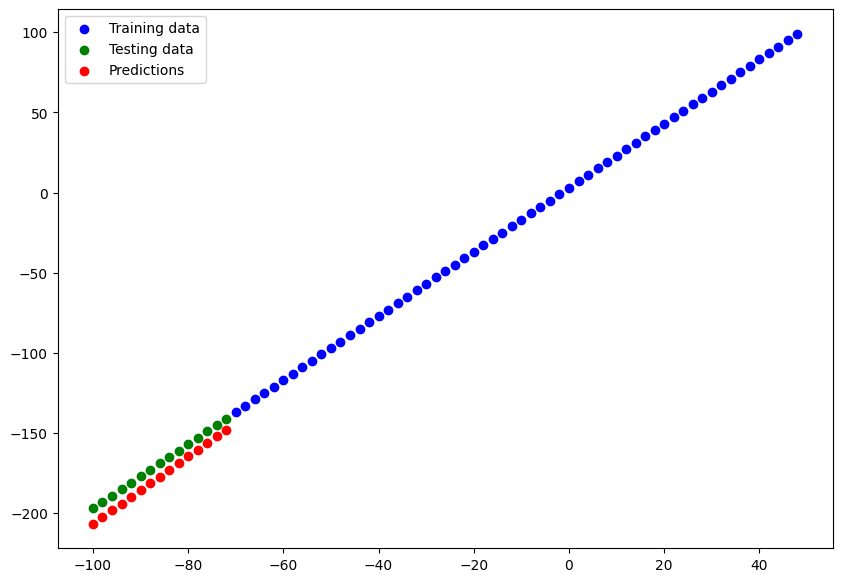

In [56]:
plot_results(x_train,y_train,x_test,y_test,y_pred)

In [57]:
model_results = [["model_simple", mae_simple, mse_simple],
                 ["model_double", mae_dobule, mse_dobule],
                 ["model_large", mae_large, mse_large],
                 ["model_final", mae_final, mse_final]]


In [58]:

import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results
     

,model,mae,mse
0,model_simple,21.504753,21.504753
1,model_double,36.520344,1346.162476
2,model_large,54.737362,3026.724365
3,model_final,10.003351,101.055862


## Save our model

A useful tool we have with the tensorflow libraries is the capability of saving our models for future uses. We can do this with [Model.save()](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model). This function saves our model's architecture, weights and training configuration.

It is possible to save it in two formas:

1. [SaveModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format)

2. [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format)

In [59]:
!mkdir -p saved_models

In [62]:
model_final.save('saved_models/2_dense_adam_mae_SM.keras')

In [63]:
!ls saved_models/2_dense_adam_mae_SM.keras

saved_models/2_dense_adam_mae_SM.keras


We could also save it in HD5 format. As the documentation points out, .keras extension is more simple and efficient. So for now, we will use that one.

## Loading a model

Let's try now to get back the model we saved into a new model, to confirm it was saved correctly.

We use [load_model()](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) function.

In [65]:
loaded_model = tf.keras.models.load_model("saved_models/2_dense_adam_mae_SM.keras")

Now, we test it with the same dataset and compare the results.

In [66]:
y_pred = loadded_model.predict(x_test)
mae_loaded = ShowMAE(y_test,y_pred)
mse_loaded = ShowMSE(y_test,y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Mean Absolute Error: 10.003351211547852
Mean Squared Error: 101.05586242675781


In [67]:
all_results

,model,mae,mse
0,model_simple,21.504753,21.504753
1,model_double,36.520344,1346.162476
2,model_large,54.737362,3026.724365
3,model_final,10.003351,101.055862


In [68]:
loaded_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (60.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10 (44.00 B)

We can check it gets the same values as model_final, which confirms the model works completely equally to our final model. We can also see that the architecture is the same as model_final.